# Using fillna()

In [7]:
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline

In [5]:
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        
        # Read in the data
        df_temp = pd.read_csv(
            symbol_to_path(symbol), 
            index_col="Date", 
            parse_dates=True, 
            usecols=['Date', 'Adj Close'],
            na_values=['nan'],
        )
    
        # Rename to prevent clash
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        
        # Join the dataframes
        df = df.join(df_temp)
        
        # Drop any rows where SPY is NaN
        df = df.dropna(subset=['SPY'])

    return df

In [4]:
symbols = ['SPY', 'FAKE2']
dates = pd.date_range('2005-12-31', '2014-12-07')
df = get_data(symbols, dates)

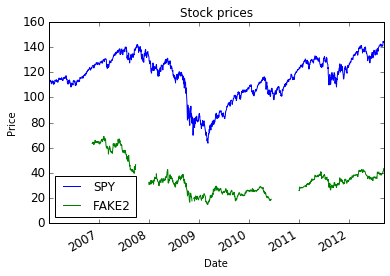

In [8]:
plot_data(df)

Notice the gaps in the `FAKE2` data above.

Let's use the `fillna` method to fill in those gaps:

In [9]:
df.fillna(method='ffill', inplace=True)

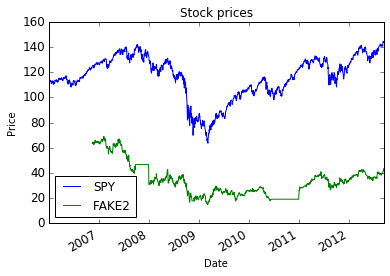

In [10]:
plot_data(df)

# Fill missing values

In [12]:
symbols = ['JAVA', 'FAKE1', 'FAKE2']
dates = pd.date_range('2005-12-31', '2014-12-07')
df = get_data(symbols, dates)

We need to forward and backward fill the values:

In [17]:
def fill_missing_values(df_data):
    # make sure to forward fill first to prevent peeking into the future
    df_data.fillna(method='ffill', inplace=True)
    df_data.fillna(method='bfill', inplace=True)

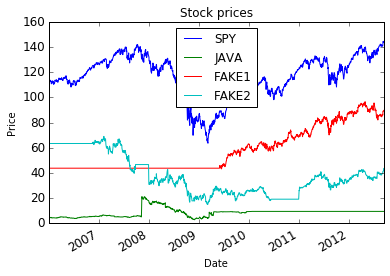

In [16]:
fill_missing_values(df)
plot_data(df)